# 对于每种作物的数据统计

In [2]:
import pandas as pd
import matplotlib

# 指定默认字体为支持中文的字体
matplotlib.rcParams['font.family'] = 'Microsoft YaHei'  # 或者 'SimHei' 'SimSun', 'Microsoft YaHei'
matplotlib.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

LandType = {"A": "平旱地", "B": "梯田", "C": "山坡地", "D": "水浇地", "E": "普通大棚", "F": "智慧大棚"}


In [3]:
df_planting = pd.read_excel('./data/2.xlsx', sheet_name=0)
df_crop_details = pd.read_excel('./data/2.xlsx', sheet_name=1)

In [4]:
df_planting['landName'] = df_planting['landName'].ffill()
df_crop_details['cropLandType'] = df_crop_details['cropLandType'].str.rstrip()

In [5]:
def get_crop_price(crop_num, crop_land_type, season):
    if crop_land_type == "智慧大棚" and season == "第一季":
        crop_land_type = "普通大棚"
    s = \
        df_crop_details[
            (df_crop_details['cropNum'] == crop_num) & (df_crop_details['cropLandType'] == crop_land_type) & (
                    df_crop_details['season'] == season)].price.values[0].split('-')
    return (float(s[0]) + float(s[1])) / 2


def get_crop_yield(crop_num, crop_land_type, season):
    if crop_land_type == "智慧大棚" and season == "第一季":
        crop_land_type = "普通大棚"
    return \
        df_crop_details[
            (df_crop_details['cropNum'] == crop_num) & (df_crop_details['cropLandType'] == crop_land_type) & (
                    df_crop_details['season'] == season)].unitYield.values[0]


def get_crop_cost(crop_num, crop_land_type, season):
    if crop_land_type == "智慧大棚" and season == "第一季":
        crop_land_type = "普通大棚"
    return \
        df_crop_details[
            (df_crop_details['cropNum'] == crop_num) & (df_crop_details['cropLandType'] == crop_land_type) & (
                    df_crop_details['season'] == season)].cost.values[0]


def get_crop_profit(crop_num, crop_land_type, season):
    return get_crop_yield(crop_num, crop_land_type, season) * get_crop_price(crop_num, crop_land_type,
                                                                             season) - get_crop_cost(crop_num,
                                                                                                     crop_land_type,
                                                                                                     season)

In [6]:
total_yield = {crop: 0 for crop in df_crop_details['cropNum'].unique()}
total_cost = {crop: 0 for crop in df_crop_details['cropNum'].unique()}
total_income = {crop: 0 for crop in df_crop_details['cropNum'].unique()}
total_profit = {crop: 0 for crop in df_crop_details['cropNum'].unique()}
for line in df_planting.values:
    # print(line[1], LandType[line[0][0]], line[5])
    yld = line[4] * get_crop_yield(line[1], LandType[line[0][0]], line[5])
    cost = line[4] * get_crop_cost(line[1], LandType[line[0][0]], line[5])
    income = yld * get_crop_price(line[1], LandType[line[0][0]], line[5])
    profit = income - cost

    total_yield[line[1]] += yld
    total_cost[line[1]] += cost
    total_income[line[1]] += income
    total_profit[line[1]] += profit
print(total_yield)  # 总产量
print(total_cost)  # 总开销
print(total_income)  # 总收入
print(total_profit)  # 总利润

{1: 57000.0, 2: 21850.0, 3: 22400.0, 4: 33040.0, 5: 9875.0, 6: 170840.0, 7: 132750.0, 8: 71400.0, 9: 30000.0, 10: 12500.0, 11: 1500.0, 12: 35100.0, 13: 36000.0, 14: 14000.0, 15: 10000.0, 16: 21000.0, 17: 36480.0, 18: 26880.0, 19: 6480.0, 20: 30000.0, 21: 36210.0, 22: 45360.0, 23: 900.0, 24: 2610.0, 25: 3600.0, 26: 4050.0, 27: 4500.0, 28: 35480.0, 29: 13050.0, 30: 2850.0, 31: 1200.0, 32: 3600.0, 33: 1800.0, 34: 1800.0, 35: 150000.0, 36: 100000.0, 37: 36000.0, 38: 9000.0, 39: 7200.0, 40: 18000.0, 41: 4200.0}
{1: 58800.0, 2: 18400.0, 3: 21000.0, 4: 33600.0, 5: 8750.0, 6: 99900.0, 7: 67500.0, 8: 66600.0, 9: 20000.0, 10: 9000.0, 11: 5250.0, 12: 13000.0, 13: 36000.0, 14: 14000.0, 15: 7000.0, 16: 28560.0, 17: 24320.0, 18: 13440.0, 19: 4320.0, 20: 30000.0, 21: 30232.0, 22: 14232.0, 23: 900.0, 24: 1860.0, 25: 2700.0, 26: 3150.0, 27: 1800.0, 28: 17860.0, 29: 3255.0, 30: 1260.0, 31: 720.0, 32: 1500.0, 33: 750.0, 34: 360.0, 35: 60000.0, 36: 12500.0, 37: 6000.0, 38: 5400.0, 39: 3600.0, 40: 18000.0,

# 对每种类型的地块中的种植情况和盈利情况进行统计

In [69]:
df_land = pd.read_excel('./data/1.xlsx', sheet_name=0)
df_crop_land = pd.read_excel('./data/1.xlsx', sheet_name=1)


In [8]:
print("---------------------")
land_crop_stats = {land_type: {} for land_type in LandType.keys()}
#  该变量存储的内容例如{"A":{"1":[field, profit] }}表示在A类型的地块中种植的作物编号为1的作物的总产量和总利润

for land in df_land.values:
    print(land[0], land[1], land[2])
    for crop in df_planting.values:
        if crop[0] == land[0]:
            print(crop[1], crop[2], crop[3], crop[4], crop[5])
            land_crop_stats[land[0][0]][crop[1]] = [get_crop_yield(crop[1], LandType[land[0][0]], crop[5]), 0]
            land_crop_stats[land[0][0]][crop[1]][1] += get_crop_profit(crop[1], LandType[land[0][0]], crop[5])
    print("---------------------")
print(land_crop_stats)

---------------------
A1 平旱地 80.0
6 小麦 粮食 80.0 单季
---------------------
A2 平旱地 55.0
7 玉米 粮食 55.0 单季
---------------------
A3 平旱地 35.0
7 玉米 粮食 35.0 单季
---------------------
A4 平旱地 72.0
1 黄豆 粮食（豆类） 72.0 单季
---------------------
A5 平旱地 68.0
4 绿豆 粮食（豆类） 68.0 单季
---------------------
A6 平旱地 55.0
8 谷子 粮食 55.0 单季
---------------------
B1 梯田 60.0
6 小麦 粮食 60.0 单季
---------------------
B2 梯田 46.0
2 黑豆 粮食（豆类） 46.0 单季
---------------------
B3 梯田 40.0
3 红豆 粮食（豆类） 40.0 单季
---------------------
B4 梯田 28.0
4 绿豆 粮食（豆类） 28.0 单季
---------------------
B5 梯田 25.0
5 爬豆 粮食（豆类） 25.0 单季
---------------------
B6 梯田 86.0
8 谷子 粮食 86.0 单季
---------------------
B7 梯田 55.0
6 小麦 粮食 55.0 单季
---------------------
B8 梯田 44.0
8 谷子 粮食 44.0 单季
---------------------
B9 梯田 50.0
9 高粱 粮食 50.0 单季
---------------------
B10 梯田 25.0
10 黍子 粮食 25.0 单季
---------------------
B11 梯田 60.0
1 黄豆 粮食（豆类） 60.0 单季
---------------------
B12 梯田 45.0
7 玉米 粮食 45.0 单季
---------------------
B13 梯田 35.0
14 莜麦 粮食 35.0 单季
---------------------
B14 梯田 

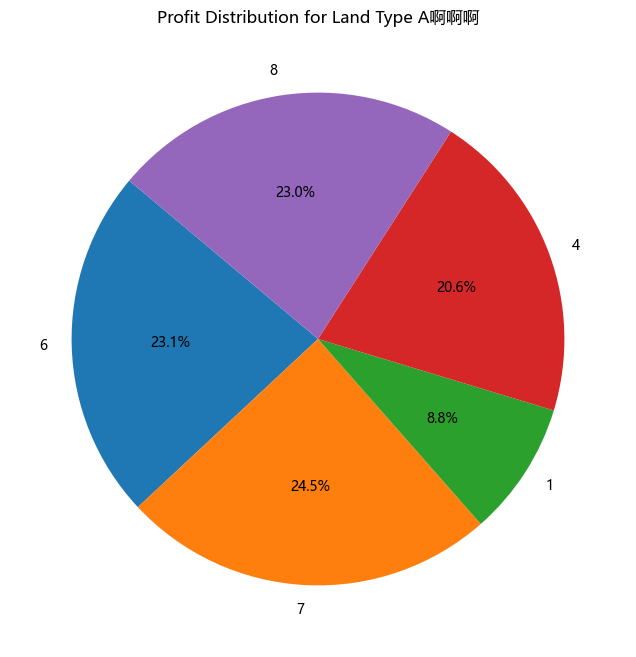

In [9]:
import matplotlib.pyplot as plt

# 提取作物编号和对应的利润
crop_ids = list(land_crop_stats['A'].keys())
profits = [info[1] for info in land_crop_stats['A'].values()]

# 创建饼图
plt.figure(figsize=(8, 8))
plt.pie(profits, labels=crop_ids, autopct='%1.1f%%', startangle=140)
plt.title('Profit Distribution for Land Type A啊啊啊')
plt.show()

In [10]:
# 数据导出
def get_crop_name(crop_num):
    return df_crop_details[df_crop_details['cropNum'] == crop_num]['cropName'].values[0]


land_crop_stats_A = {get_crop_name(crop_num): v for crop_num, v in land_crop_stats['A'].items()}
land_crop_stats_A

{'小麦': [800, 2350.0],
 '玉米': [1000, 2500.0],
 '黄豆': [400, 900.0],
 '绿豆': [350, 2100.0],
 '谷子': [400, 2340.0]}

In [11]:
import pandas as pd

# 创建一个Excel写入器
with pd.ExcelWriter('land_crop_stats.xlsx') as writer:
    for land_type in ['A', 'B', 'C', 'D', 'E', 'F']:
        # 转换数据格式
        land_crop_stats_land = {get_crop_name(crop_num): v for crop_num, v in land_crop_stats[land_type].items()}
        df = pd.DataFrame.from_dict(land_crop_stats_land, orient='index', columns=['产量', '利润'])
        df.reset_index(inplace=True)
        df.rename(columns={'index': '作物'}, inplace=True)

        # 写入对应的sheet
        df.to_excel(writer, sheet_name=land_type, index=False)

print("Excel文件已成功导出为 'land_crop_stats.xlsx'")


Excel文件已成功导出为 'land_crop_stats.xlsx'


# 亩利润

In [20]:
unit_profit = []
for line in df_crop_details.values:
    s = str(line[7]).split('-')
    unit_profit.append((float(s[0]) + float(s[1])) / 2 * line[5] - line[6])
df_crop_details['unitProfit'] = unit_profit
df_crop_details

no  cropNum cropName cropLandType season  unitYield  cost       price  \
0      1        1       黄豆          平旱地     单季        400   400   2.50-4.00   
1      2        2       黑豆          平旱地     单季        500   400   6.50-8.50   
2      3        3       红豆          平旱地     单季        400   350   7.50-9.00   
3      4        4       绿豆          平旱地     单季        350   350   6.00-8.00   
4      5        5       爬豆          平旱地     单季        415   350   6.00-7.50   
..   ...      ...      ...          ...    ...        ...   ...         ...   
102  103       30      生菜          智慧大棚    第二季       4500  2200   5.40-7.20   
103  104       31       辣椒         智慧大棚    第二季       1800  1300  7.20-10.20   
104  105       32      空心菜         智慧大棚    第二季      11000  5500   3.60-7.20   
105  106       33      黄心菜         智慧大棚    第二季       5400  2750   4.80-6.00   
106  107       34       芹菜         智慧大棚    第二季       6000  1200   3.80-5.80   

     unitProfit  
0        900.00  
1       3350.00  
2       2950.00  
3       2100.00  
4       2451.25  
..          ...  
102    26150.00  
103    14360.00  
104    53900.00  
105    26410.00  
106    27600.00  

[107 rows x 9 columns]

# 地块统计

In [76]:
# 统计每种土地类型的面积总和
total_area = df_land.groupby('landType')['landArea'].sum()
custom_order = ['山坡地', '平旱地', '智慧大棚','梯田', '水浇地', '普通大棚']
total_area_reordered = total_area.reindex(custom_order)
total_area

landType
山坡地     108.0
平旱地     365.0
普通大棚      9.6
智慧大棚      2.4
梯田      619.0
水浇地     109.0
Name: landArea, dtype: float64

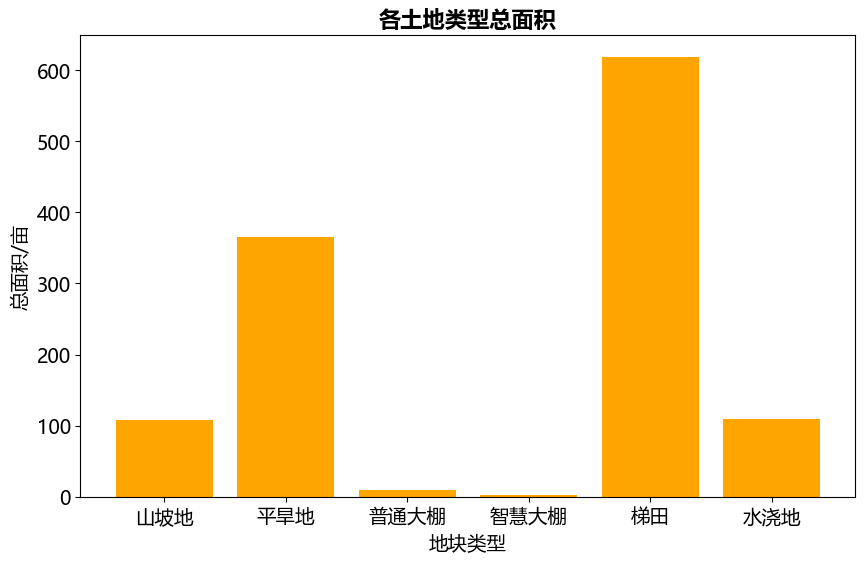

In [96]:
# 将total_area分别使用柱状图和饼状图进行可视化
plt.figure(figsize=(10, 6))
plt.bar(total_area.index, total_area.values, color='orange')
plt.xlabel('地块类型', fontsize=14)
plt.ylabel('总面积/亩', fontsize=14)
plt.title('各土地类型总面积', fontsize=16, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
# plt.figure(figsize=(8, 8))
# plt.pie(total_area_reordered.values, labels=total_area_reordered.index, autopct='%1.1f%%')
# plt.title('各土地类型面积分布')
# plt.show()


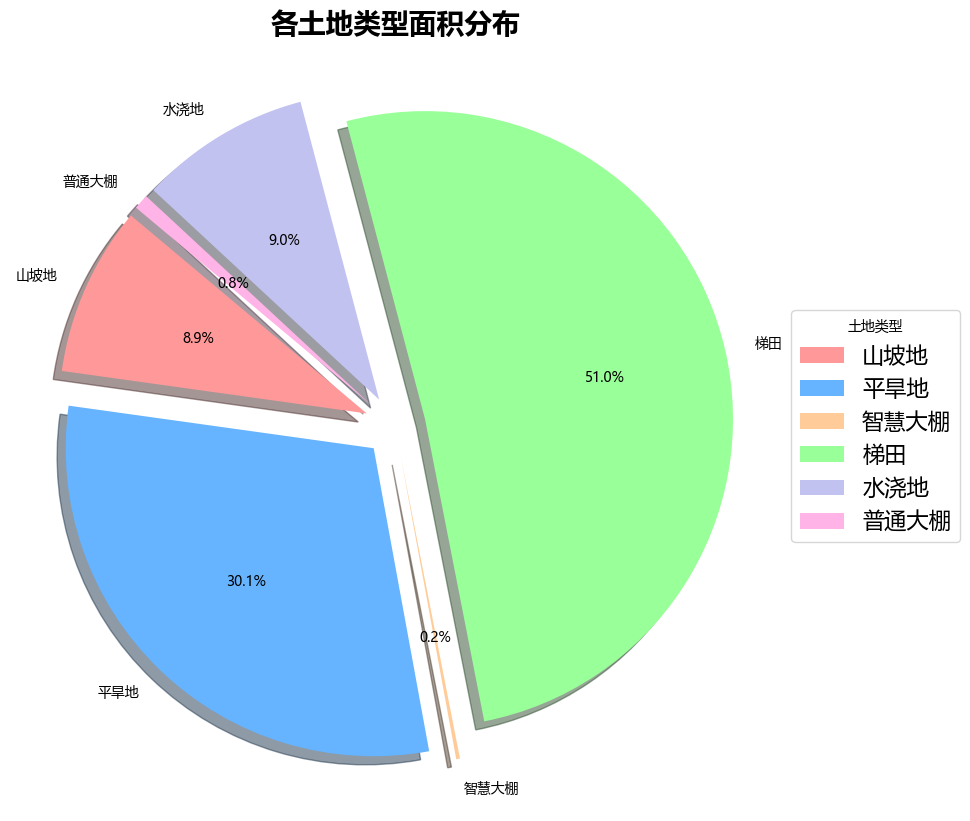

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# 选择一个颜色列表
colors = [ '#ff9999', '#66b3ff', '#ffcc99', '#99ff99','#c2c2f0', '#ffb3e6']

# 绘制饼图
plt.pie(total_area_reordered.values, 
        labels=total_area_reordered.index, 
        autopct='%1.1f%%', 
        colors=colors, 
        startangle=140, 
        shadow=True, 
        explode=[0.1]*len(total_area_reordered),
        )

# 添加标题
plt.title('各土地类型面积分布', fontsize=20, fontweight='bold')

# 添加图例
plt.legend(title='土地类型', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1), fontsize=16)

# 显示图表
plt.show()
